<a href="https://colab.research.google.com/github/DheepthaRai/Machine-Learning-Exercises/blob/main/Ex3_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/lenses/lenses.data"
df = pd.read_csv(url, names=['Id', 'Age', 'Specs_Presc', 'Astig', 'TPR', 'Class'], sep = '  ', na_values='?')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,Id,Age,Specs_Presc,Astig,TPR,Class
0,1,1,1,1,1,3.0
1,2,1,1,1,2,2.0
2,3,1,1,2,1,3.0
3,4,1,1,2,2,1.0
4,5,1,2,1,1,3.0


In [3]:
df.describe()

,Age,Specs_Presc,Astig,TPR,Class
count,24.000000,24.000000,24.000000,24.000000,9.000000
mean,1.375000,1.500000,1.500000,2.125000,2.333333
std,0.494535,0.510754,0.510754,0.850192,0.866025
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,2.000000
50%,1.000000,1.500000,1.500000,2.000000,3.000000
75%,2.000000,2.000000,2.000000,3.000000,3.000000
max,2.000000,2.000000,2.000000,3.000000,3.000000


In [15]:
df['Age'].fillna(int(df['Age'].mean()), inplace=True)
df['Specs_Presc'].fillna(int(df['Specs_Presc'].mean()), inplace=True)
df['Astig'].fillna(int(df['Astig'].mean()), inplace=True)
df['TPR'].fillna(int(df['TPR'].mean()), inplace=True)
df['Class'].fillna(int(df['Class'].mean()), inplace=True)

In [16]:
Q = df.drop(['Id'],axis=1)

In [23]:
X = Q.drop(['Class'],axis=1)
y = Q.Class.astype(int)

In [24]:
print(X)

    Age  Specs_Presc  Astig  TPR
0     1            1      1    1
1     1            1      1    2
2     1            1      2    1
3     1            1      2    2
4     1            2      1    1
5     1            2      1    2
6     1            2      2    1
7     1            2      2    2
8     2            1      1    1
9     1            1      2    2
10    1            2      1    3
11    1            2      2    1
12    2            1      1    3
13    2            1      2    2
14    2            2      1    3
15    2            2      2    3
16    1            1      1    3
17    1            1      2    3
18    1            2      1    3
19    1            2      2    1
20    2            1      1    3
21    2            1      2    2
22    2            2      1    3
23    2            2      2    3


In [25]:
print(y)

0     3
1     2
2     3
3     1
4     3
5     2
6     3
7     1
8     3
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
20    2
21    2
22    2
23    2
Name: Class, dtype: int64


In [26]:
lda = LDA(n_components=2)
lda_X = lda.fit(X,y).transform(X)

Text(0.5, 1.0, 'LDA plot for Lense Dataset')

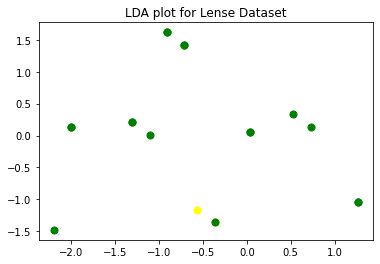

In [27]:
plt.scatter(lda_X[y == 0, 0], lda_X[y == 0, 1], s =50, c = 'orange', label = 'the patient should be fitted with hard contact lenses')
plt.scatter(lda_X[y == 1, 0], lda_X[y == 1, 1], s =50,  c = 'yellow', label = 'the patient should be fitted with soft contact lenses')
plt.scatter(lda_X[y == 2, 0], lda_X[y == 2, 1], s =50,  c = 'green', label = 'the patient should not be fitted with contact lenses')
plt.title('LDA plot for Lense Dataset')